# Control de Versiones con GIT

Un sistema de control de versiones permite el tracking de los cambios efectuados en el código fuente o cualquier otro tipo de archivo, además, permite llevar el registro de las modificaciones, regresar a una versión anterior,facilitando la colaboración entre equipos.

## Modelo de Datos GIT

En una estructura de almacenamiento de archivos como la siguiente:
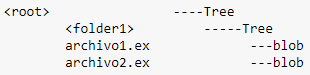

En GIT se podría decir que cada Folder, incluyendo el folder base(root) se denominan como <b>"trees"</b>(Arboles) que mapean ya sea otros "trees" o a archivos denominados <b>"blob"</b>; estos elementos blob, son los elementos que contienen la información que se debe versionar.

El sistema de control de versiones, debe mantener un <b>snapshot</b> de como se encuentran cada uno de los elementos de la estructura que estamos versionando en el momento de un <b>commit</b> (confirmación de almacenamiento); esto permitirá regresar sin mayores incovenientes a una versión especifica, además de controlar que modificaciones se han hecho a cada archivo por cada commit.

Cada commit tendría un identificador único (Hash) o una referencia; permitiendonos usarlo, para comparaciones, modificaciones y demás.

## Guia de Comandos

### Ejemplo de Creación Repositorio

In [2]:
##Para este ejemplo creamos un directorio que nos servirá para nuestro repositorio
!mkdir GitProject

##Accedemos al directorio 
!cd GitProject

In [14]:
## Creamos nuevo Repositorio
!git init

Initialized empty Git repository in C:/Users/jonathan.deleon/Documents/Python/GitProject/.git/


In [24]:
##Observemos que se ha creado un archivo .git en el directorio
!dir GitProject

 Volume in drive C has no label.
 Volume Serial Number is DE2C-6EED

 Directory of C:\Users\jonathan.deleon\Documents\Python\GitProject

02/21/2020  12:54 PM    <DIR>          .
02/21/2020  12:54 PM    <DIR>          ..
02/21/2020  12:47 PM    <DIR>          .ipynb_checkpoints
02/21/2020  12:54 PM             5,732 GitNotebook.ipynb
               1 File(s)          5,732 bytes
               3 Dir(s)  142,729,449,472 bytes free


** No es visualizable, dado que no muestra los archivos ocultos del sistema, y este archivo .git se encuentra oculto

In [40]:
##Vemos el Estatus de nuestro repositorio GIT
!git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [42]:
##Se crea un programa sencillo en Python
%run hello.py

Hello World
HELLO WORLD


In [43]:
##Volvemos a ver el estatus del Repositorio
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hello.py

nothing added to commit but untracked files present (use "git add" to track)


Nota: Podemos observar que el archivo aparece, pero no se ha agregado al repositorio

In [2]:
##Agregamos el archivo para el Commit
!git add hello.py

In [47]:
##Volvemos a ver el estatus del Repositorio
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   hello.py



Nota: El archivo ya se agrego al repositorio, para ser actualizado en el siguiente commit.

In [3]:
##Volvemos a ver el estatus del Repositorio
!git commit


[master (root-commit) fb2b299] Primer Cambio en Commit
 1 file changed, 5 insertions(+)
 create mode 100644 hello.py


Al confirmar nos pide llenar el comentario del Commit, en mi caso, el editor por defecto es Visual Studio Code.
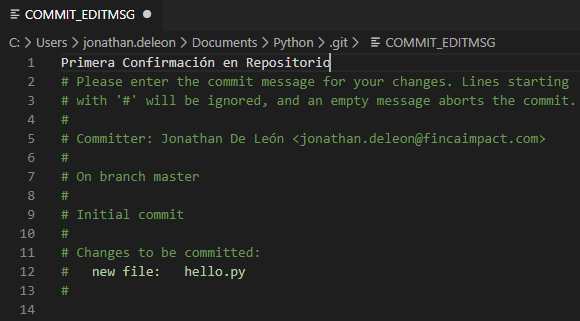

In [49]:
##Volvemos a ver el estatus del Repositorio
!git status

On branch master
nothing to commit, working tree clean


### Seguimiento de Cambios

#### Log de Cambios

In [6]:
##Si queremos ver el log de cambios de forma general
!git log 

commit d142605afa11d652c27974ddd2944d762850865b
Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
Date:   Fri Feb 21 15:58:00 2020 -0600

    Reescribir codigo programa Hello

commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
Date:   Fri Feb 21 15:52:57 2020 -0600

    Primer Cambio en Commit


In [7]:
##Si queremos ver el log tipo grafo
!git log  --all --graph --decorate

* commit d142605afa11d652c27974ddd2944d762850865b (HEAD -> master)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


** Para este ejemplo no es muy representativo, dado que no hay ramas (branchs) o muchos commits

#### Diferencias entre commits

In [10]:
##Diferencia entre el archivo y el último commit
!git diff hello.py

diff --git a/hello.py b/hello.py
index bd2ecc0..bb42f31 100644
--- a/hello.py
+++ b/hello.py
@@ -4,7 +4,7 @@ def main():
     ##Inicializamos los valores por defecto
     numero1=1
     numero2=1
-    print("Evaluate Simple Math Operation")
+    print("Evaluate Simple Math Operation!!!!!")
     if len(sys.argv)>1 and str.isnumeric(sys.argv[1]):
         numero1=int(sys.argv[1])
     if len(sys.argv)>2 and str.isnumeric(sys.argv[2]):


In [11]:
##diferencia entre el archivo y una revisión (commit) especifico
!git diff fb2b29937 hello.py

diff --git a/hello.py b/hello.py
index 8f1e568..bb42f31 100644
--- a/hello.py
+++ b/hello.py
@@ -1,5 +1,16 @@
-msg ="Hello World"
-print(msg)
+import sys
 
-msg=msg.upper()
-print(msg)
\ No newline at end of file
+def main():
+    ##Inicializamos los valores por defecto
+    numero1=1
+    numero2=1
+    print("Evaluate Simple Math Operation!!!!!")
+    if len(sys.argv)>1 and str.isnumeric(sys.argv[1]):
+        numero1=int(sys.argv[1])
+    if len(sys.argv)>2 and str.isnumeric(sys.argv[2]):
+        numero2 = int(sys.argv[2]) 
+    resultado = numero1 + numero2
+    print("Result=",resultado)
+    
+
+main()
\ No newline at end of file


** Practicamente se sobreescribio el archivo hello.py

In [12]:
##Si queremos regresar a un commit en especifcio
!git checkout fb2b29937

error: Your local changes to the following files would be overwritten by checkout:
	hello.py
Please commit your changes or stash them before you switch branches.
Aborting


In [13]:
##En el caso anterior, no se forzó en checkout, porque hay cambios sin commit, se puede forzar de la siguiente manera
!git checkout fb2b29937 -f

Note: switching to 'fb2b29937'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at fb2b299 Primer Cambio en Commit


In [17]:
##observamos nuestro estatus
!git log --all --graph --decorate

* commit d142605afa11d652c27974ddd2944d762850865b (master)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce (HEAD)
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


** Nuestro ambiente (HEAD) se encuentra en el primer commit.

In [22]:
##Si queremos quitar los cambios para un archivo en especifico
!git checkout -- hello.py

In [23]:
##verificamos 
!git status hello.py

On branch master
nothing to commit, working tree clean


### Branch y Merge

In [26]:
##Revisión - Cuales branchs se encuentran en el ambiente
!git branch

* master


** En este caso solo tenemos la Master

In [28]:
##Creamos una branch (Rama)
!git branch SinUltimosC

In [31]:
##Vemos la rama creada
!git branch

  SinUltimosC
* master


In [33]:
##Nos switchemos a la rama
!git checkout SinUltimosC 
##Nos pudimos haber ahorrado el paso ante-anterior si hubieramos colocado
## git checkout -b SinUltimosC
## o 
## git branch SinUltimosC; git checkout SinUltimosC

Switched to branch 'SinUltimosC'


In [34]:
##Vemos como se encuentra nuestra branch
!git log --all --graph --decorate

* commit d142605afa11d652c27974ddd2944d762850865b (HEAD -> SinUltimosC, master)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


** Vemos que nuestra branch y nuestra master estan iguales

In [52]:
## Efectuamos cambios en el archivo de Hello.py y vemos los resultados
## Ahora imprime mensaje recibido por parametros
%run hello.py 4 5

Evaluate Simple Math Operation
Suma= 9
Multiplicación= 9


In [53]:
##Agregamos y confirmamos el cambio
!git add hello.py
!git commit -m "Variación del Programa de Multiplicación"

[SinUltimosC 6133380] VariaciÃ³n del Programa de MultiplicaciÃ³n
 1 file changed, 4 insertions(+), 2 deletions(-)


In [54]:
##Vemos el log
!git log --all --graph --decorate

* commit 613338039b03387b9a2bfe1db86030df51c064ab (HEAD -> SinUltimosC)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 17:05:02 2020 -0600
| 
|     VariaciÃ³n del Programa de MultiplicaciÃ³n
| 
* commit d142605afa11d652c27974ddd2944d762850865b (master)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


** Aquí ya se pueden comenzar a visualizar las ramas (Branchs)

In [55]:
##Ahora si buscamos actualizar la Rama Master, con lo que tiene la branch
##Nos switcheamos a la Rama mater
!git checkout Master

Switched to branch 'Master'


In [57]:
#Efectuamos el Merge
!git merge 61333803
##Tambien podría haber sido un merge con el nombre del branch
## git merge SinUltimosC

Updating d142605..6133380
Fast-forward
 hello.py | 6 ++++--
 1 file changed, 4 insertions(+), 2 deletions(-)


** Sino hay conflictos, el merge se hará de forma automática

In [59]:
##Vemos el estatus
!git status

On branch Master
nothing to commit, working tree clean


In [60]:
#Vemos el Log ya actualizado
!git log --all --graph --decorate

* commit 613338039b03387b9a2bfe1db86030df51c064ab (HEAD -> Master, SinUltimosC)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 17:05:02 2020 -0600
| 
|     VariaciÃ³n del Programa de MultiplicaciÃ³n
| 
* commit d142605afa11d652c27974ddd2944d762850865b
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


#### Merge con Conflictos

In [ ]:
##Al tener conflictos, tendremos que abrir la herramienta para solucionar los conflictos
!git mergetool

##Reagramos el archivo que corregimos
!git add hello.py

##y Darle que contine con el merge
!git merge --continue

In [70]:
##Si queremos cancelar el merge
!git merge --abort

### Manejo de Repositorios Remotos

#### Asociación y Actualización Repositorio Remoto

In [16]:
##Vemos cuantos remotos tenemos asociados a nuestro ambiente
!git remote

In [22]:
#Inicializamo un Repositorio que nos servirá para la prueba
!git init ..\..\TestRemote --bare

Initialized empty Git repository in C:/Users/jonathan.deleon/Documents/TestRemote/


In [32]:
##Hacemos que nuestro repositorio sea consciente de algún repositorio remoto
## git remote add <name> <url>
## el URL puede ser una ubicación en algún directorio del sistema o la URL de Github
!git remote add origin C:\Users\jonathan.deleon\Documents\Python\TestRemote


In [33]:
##Actualizamos los cambios al Repositorio remoto
## git push <remote> <localbranc>:<remotebranch>
!git push origin master:master

To C:\Users\jonathan.deleon\Documents\Python\TestRemote
 * [new branch]      master -> master


In [35]:
##Vemos el Log - Como nos indica la rama atada al remoto
!git log --all --graph --decorate

* commit 4923b969eb4f0533907f28973014a0237412d4cf (HEAD -> master, origin/master)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 17:50:32 2020 -0600
| 
|     mas cambios
| 
* commit f9bec6fd87c6f8631293bdc0eec69ccd3885cffa (SinUltimosC)
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 17:48:05 2020 -0600
| 
|     Dejar variables Fijas
| 
* commit 613338039b03387b9a2bfe1db86030df51c064ab
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 17:05:02 2020 -0600
| 
|     VariaciÃ³n del Programa de MultiplicaciÃ³n
| 
* commit d142605afa11d652c27974ddd2944d762850865b
| Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
| Date:   Fri Feb 21 15:58:00 2020 -0600
| 
|     Reescribir codigo programa Hello
| 
* commit fb2b29937f709c20e07d55bc4c9d6b7ad649a2ce
  Author: Jonathan De LeÃ³n <jonathan.deleon@galileo.edu>
  Date:   Fri Feb 21 15:52:57 2020 -0600
  
      Primer Cambio en Commit


In [37]:
##Al hacer un cambio y revisar nuevamente el Log, vemos como se desincroza nuevamente la master con el Remote
!git log --all --graph --decorate --oneline

* e77acfc (HEAD -> master) Nuevo Cambio pruebas Remote
* 4923b96 (origin/master) mas cambios
* f9bec6f (SinUltimosC) Dejar variables Fijas
* 6133380 VariaciÃ³n del Programa de MultiplicaciÃ³n
* d142605 Reescribir codigo programa Hello
* fb2b299 Primer Cambio en Commit


In [39]:
##Se sincroniza nuevamente con un push
!git push origin master:master

Everything up-to-date


In [44]:
##Sino queremos dirigir siempre la asociación entre una branch y el remoto, se puede usar el comando
!git branch --set-upstream-to=origin/master

Branch 'master' set up to track remote branch 'master' from 'origin'.


In [45]:
##Con el comando anterior ya se puede hacer un push sin especiciar el remote y el branch
!git push

Everything up-to-date


In [47]:
##Al revisar las branchs, podemos ver la asociación
!git branch -vv

  SinUltimosC f9bec6f Dejar variables Fijas
* master      e77acfc [origin/master] Nuevo Cambio pruebas Remote


#### Clonación de Repositorio

In [43]:
##Clonación de Repositorio Remoto
## git clone <url> <nombrelocalRep>

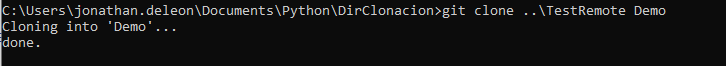

In [ ]:
##En el nuevo Repositorio se tendrá toda la historia del Reposito clonado

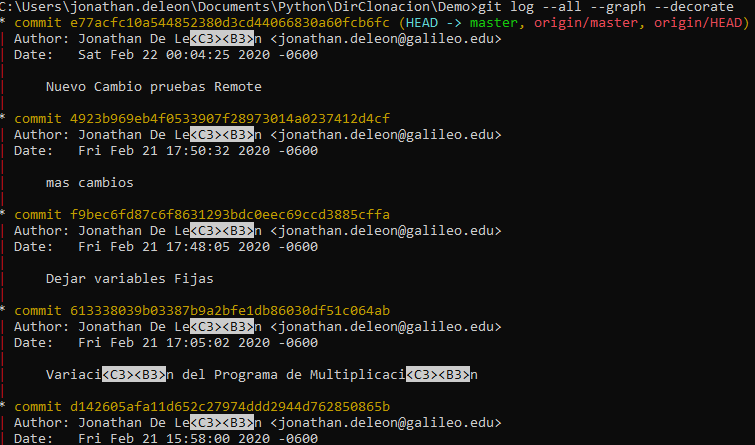

In [ ]:
##Usando --shallow toda la historia del repositorio no se copia
##git clone --shallow <url> <nombrelocalRep>

** Ya tiene asociado el Remoto, no es necesaria la asociación.

#### Descargar Cambios Remoto

In [51]:
##Para descargar los cambios actualizados en un repositorio podemos
!git fetch

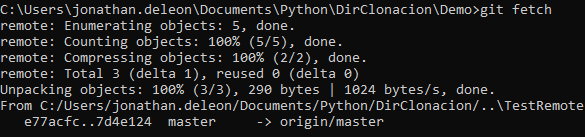

In [ ]:
##El Problema es que deja desincronizada nuestra branch del repositorio clonado

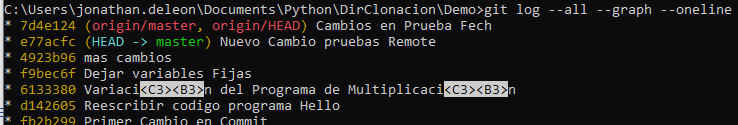

In [ ]:
##Para sincronizar se tendria que ejecutar 
##git merge

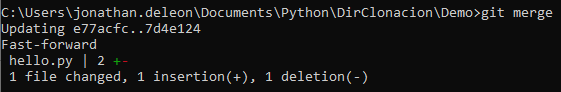

In [53]:
##Para evitar el trabajo anterior se podría haber ejecutado los dos comandos al mismo tiempo
## git fetch; git merge
## o
!git pull

## Otros comandos de Referencia

### Ayuda

In [15]:
##Obtener ayuda - Referencia de comandos
!git help

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone             Clone a repository into a new directory
   init              Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add               Add file contents to the index
   mv                Move or rename a file, a directory, or a symlink
   restore           Restore working tree files
   rm                Remove files from the working tree and from the index
   sparse-checkout   Initialize and modify the sparse-checkout

examine the history and state (see also: git help revisio

### Configuración de Autor

In [4]:
##Modificación del archivo de configuración
!git config --global --edit


Abre el editor de texto, permitiendo modificar la configuración general.
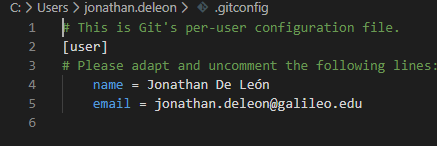

** Para este caso en particular solo se dejo configurado el autor.

### Omisión de Archivos

In [39]:
##Indicar a GIT cuales archivos Omitir
!echo .gitignore>>.gitignore
!echo GitProject.ipynb >>.gitignore

Considerar:
* Si el archivo no esta creado deberá crearse.
* Puede modificarse el archivo en cualquier editor de texto.

### Quien efectuó cambios al archivo

In [55]:
##con este comando podemos ver quien hizo el último cambio en el archivo, por linea
!git blame hello.py

d142605a (Jonathan De LeÃ³n 2020-02-21 15:58:00 -0600  1) import sys
^fb2b299 (Jonathan De LeÃ³n 2020-02-21 15:52:57 -0600  2) 
d142605a (Jonathan De LeÃ³n 2020-02-21 15:58:00 -0600  3) def main():
d142605a (Jonathan De LeÃ³n 2020-02-21 15:58:00 -0600  4)     ##Inicializamos los valores por defecto
d142605a (Jonathan De LeÃ³n 2020-02-21 15:58:00 -0600  5)     numero1=1
d142605a (Jonathan De LeÃ³n 2020-02-21 15:58:00 -0600  6)     numero2=1
4923b969 (Jonathan De LeÃ³n 2020-02-21 17:50:32 -0600  7)     resultado2 = numero2 * numero1
7d4e1240 (Jonathan De LeÃ³n 2020-02-22 00:30:11 -0600  8)     print("Evaluate Simple Math Operation (SUM/Mul)")
f9bec6fd (Jonathan De LeÃ³n 2020-02-21 17:48:05 -0600  9)     ##Se sustituyen por sumas fijas
f9bec6fd (Jonathan De LeÃ³n 2020-02-21 17:48:05 -0600 10)     numero1=20
f9bec6fd (Jonathan De LeÃ³n 2020-02-21 17:48:05 -0600 11)     numero2=40
61333803 (Jonathan De LeÃ³n 2020-02-21 17:05:02 -0600 12)     resultado1 = numero1 + numero2
4923b969 (Jonathan